
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

import warnings
warnings.filterwarnings("ignore")
from scipy import stats

## 2. Данные

In [5]:
df = pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [6]:
# ваше решение
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Вывод:**
- Люди пожилого возраста составляют 16 процентов от общего числа
- В среднем по медиане клиенты оставались в компании в течении 29 месяцев
- Минимально оставались в компании - 0 месяцев (вероятно это новые клиенты)
- В среднем ежемесячно с клиентов взимается 70
- Судя по std количество месяцев в компании и оплата клиентов довольно сильно разбросаны

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [7]:
# ваше решение
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Вывод:**
- Клиенты компании чаще не являются кормильцами
- Преимущественно у всех есть телефонная связь
- Практически половина клиентов не имеют технической поддержки
- Более 50% с контрактом на месяц
- Большинство клиентов остались в компании
- В TotalCharges самое частое значение - пустое. Есть пропуски данных

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Проверяем наличие дубликатов
duplicates = df.duplicated()

# Фильтруем DataFrame по дубликатам
duplicated_rows = df.loc[duplicates]
print(duplicated_rows)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [10]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [11]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [12]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [13]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6119,0080-EMYVY,Female,0,No,No,14,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Credit card (automatic),51.45,727.85,No
5113,9258-CNWAC,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.65,8166.80,No
2756,5624-BQSSA,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.95,20.95,Yes
4285,1506-YJTYT,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),73.85,3371.00,No
6407,6728-CZFEI,Female,0,No,No,15,Yes,No,DSL,No,No,No,No,Yes,No,One year,No,Mailed check,56.15,931.90,No


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [14]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [15]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [16]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [17]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [18]:
# ваше решение
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Вывод:** нет необходимости заменять типы остальных столбцов

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [19]:
# ваше решение
# Нулевая гипотеза - среднее количество месяцев не отличается
a = df.loc[df['Churn'] == 'Yes'].tenure
b = df.loc[df['Churn'] == 'No'].tenure

alpha = .05

_, pvalue = stats.ttest_ind(a, b)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


**Вывод:** Действительно, среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответсвуют ли распредения нормальному?

In [20]:
# ваше решение
# H0 - распределение нормальное
numeric_values = df.select_dtypes(include=['int', 'float'])

alpha = 0.05

for column_name, column_data in numeric_values.iteritems():
    _, pvalue = stats.normaltest(column_data)
    print(f"Столбец: {column_name}")
    if pvalue < alpha:
        print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
    else:
        print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')
    print()

Столбец: SeniorCitizen
P-value:0.00000. Нулевая гипотеза отвергается

Столбец: tenure
P-value:0.00000. Нулевая гипотеза отвергается

Столбец: MonthlyCharges
P-value:0.00000. Нулевая гипотеза отвергается

Столбец: TotalCharges
P-value:0.00000. Нулевая гипотеза отвергается



**Вывод:** у всех числовых признаков ненормальное распределение

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

Предобработка данных

In [21]:
# Подсчитаем уникальные значения
df.nunique ()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [22]:
# Преобразование столбцов типа "object" в числовые значения (кроме customerID)
for column in df.columns:
    if column != 'customerID' and df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

С чем коррелирует churn

In [23]:
# Вычисляем коэффициенты корреляции Пирсона
for column in df.columns:
    if column != 'customerID' and column != 'Churn': 
        correlation, pvalue = stats.pearsonr(df['Churn'], df[column])
        if pvalue < alpha:
            print(f'{column}: Есть корреляция. p-value = {pvalue:.2f}')
        else:
            print(f'\n{column}: Нет корреляции. p-value = {pvalue:.2f}\n')


gender: Нет корреляции. p-value = 0.47

SeniorCitizen: Есть корреляция. p-value = 0.00
Partner: Есть корреляция. p-value = 0.00
Dependents: Есть корреляция. p-value = 0.00
tenure: Есть корреляция. p-value = 0.00

PhoneService: Нет корреляции. p-value = 0.32

MultipleLines: Есть корреляция. p-value = 0.00
InternetService: Есть корреляция. p-value = 0.00
OnlineSecurity: Есть корреляция. p-value = 0.00
OnlineBackup: Есть корреляция. p-value = 0.00
DeviceProtection: Есть корреляция. p-value = 0.00
TechSupport: Есть корреляция. p-value = 0.00
StreamingTV: Есть корреляция. p-value = 0.00
StreamingMovies: Есть корреляция. p-value = 0.00
Contract: Есть корреляция. p-value = 0.00
PaperlessBilling: Есть корреляция. p-value = 0.00
PaymentMethod: Есть корреляция. p-value = 0.00
MonthlyCharges: Есть корреляция. p-value = 0.00
TotalCharges: Есть корреляция. p-value = 0.00


In [24]:
# Вычисляем коэффициенты корреляции Спирмена
for column in df.columns:
    if column != 'customerID' and column != 'Churn': 
        correlation, pvalue = stats.spearmanr(df['Churn'], df[column])
        if pvalue < alpha:
            print(f'{column}: Есть корреляция. p-value = {pvalue:.2f}')
        else:
            print(f'\n{column}: Нет корреляции. p-value = {pvalue:.2f}\n')


gender: Нет корреляции. p-value = 0.47

SeniorCitizen: Есть корреляция. p-value = 0.00
Partner: Есть корреляция. p-value = 0.00
Dependents: Есть корреляция. p-value = 0.00
tenure: Есть корреляция. p-value = 0.00

PhoneService: Нет корреляции. p-value = 0.32

MultipleLines: Есть корреляция. p-value = 0.00
InternetService: Есть корреляция. p-value = 0.02
OnlineSecurity: Есть корреляция. p-value = 0.00
OnlineBackup: Есть корреляция. p-value = 0.00
DeviceProtection: Есть корреляция. p-value = 0.00
TechSupport: Есть корреляция. p-value = 0.00
StreamingTV: Есть корреляция. p-value = 0.00
StreamingMovies: Есть корреляция. p-value = 0.00
Contract: Есть корреляция. p-value = 0.00
PaperlessBilling: Есть корреляция. p-value = 0.00
PaymentMethod: Есть корреляция. p-value = 0.00
MonthlyCharges: Есть корреляция. p-value = 0.00
TotalCharges: Есть корреляция. p-value = 0.00


In [25]:
import matplotlib.pyplot as plt # библиотека для визуализации данных

import phik
from phik.report import plot_correlation_matrix
from phik import report

interval columns not set, guessing: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


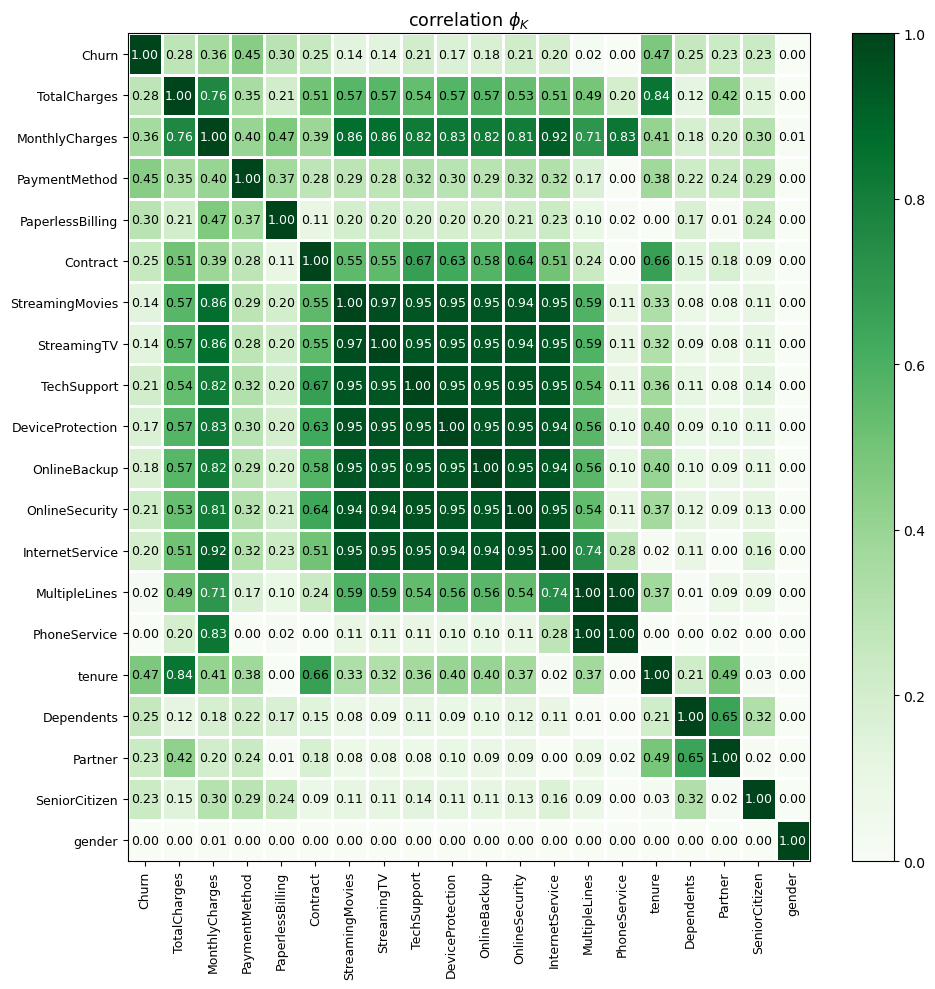

In [26]:
phik_overview = df.iloc[:, 1:21].phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(10, 10))
plt.tight_layout()

Гипотеза H1: средняя сумма, взимая с клиента ежемесячно отличается между двумя выборками `Churn='0'` и `Churn='1'` 

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,3668-QPYBK,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1


In [28]:
# Нулевая гипотеза - средняя сумма не отличается
a = df.loc[df['Churn'] == 1].MonthlyCharges # Ушедшие
b = df.loc[df['Churn'] == 0].MonthlyCharges # Неушедшие

alpha = .05

t_statistic, pvalue = stats.ttest_ind(a, b)

if pvalue < alpha:
    print("Средняя сумма, взимаемая с клиента ежемесячно, отличается статистически значимо между выборками.")
    if t_statistic > 0:
        print("Средняя сумма ушедших клиентов выше, чем у неушедших клиентов.")
    else:
        print("Средняя сумма ушедших клиентов ниже, чем у неушедших клиентов.")
else:
    print("Нет достаточных доказательств для отвержения нулевой гипотезы о равенстве средних сумм.")

Средняя сумма, взимаемая с клиента ежемесячно, отличается статистически значимо между выборками.
Средняя сумма ушедших клиентов выше, чем у неушедших клиентов.


# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:

Имеется более-менее высокая корреляция со способом оплаты, и количеством месяцев, в течение которых клиент оставался в компании, а также суммой, взимаемой с клиента ежемесячно. Вероятно клиенты уходят из-за слишком высокой месячной платы.